In [44]:
#make 4 grid depicting column density with curve fit function
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize

In [79]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz')
percent = 0
perc = '0'
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
lower_limit = .9
upper_limit = 3

In [80]:
#define function
def linear(x, m, b): 
    return m*x + b
    
#y2 = linear(range(6),np.ones(6)*2,np.ones(6))

In [81]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
1
2
3


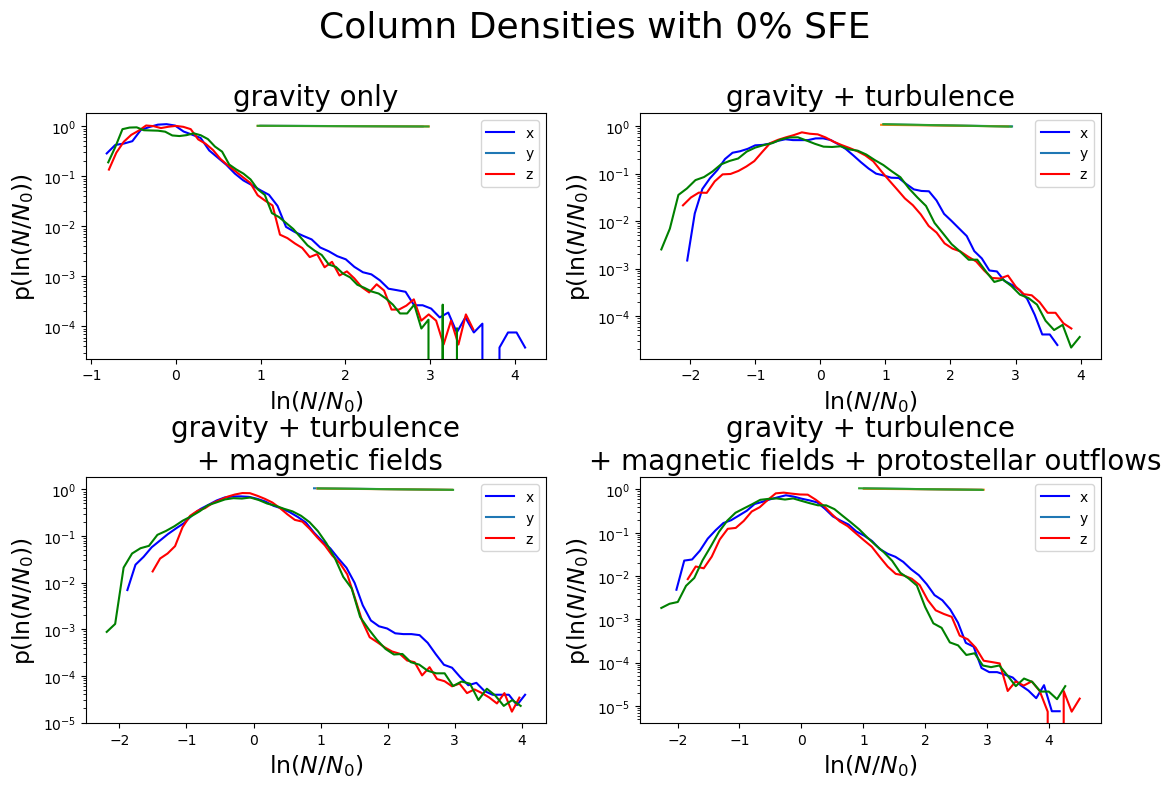

time: 0.9795260190963745


In [82]:
#main processing cell. 
start = time.time()
print('starting')

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=False,figsize=(12,8))
ax =ax.ravel()
plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)


for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('b', 'r', 'g')
    print(n)     #for time keeping
    
    for a in (range(3)):
        den_d = np.sum(den, axis = a)
        den_flat_d = den_d.flatten()
        den_mean_d = np.mean(den_flat_d)
        log_den_d = np.log(den_flat_d/den_mean_d)  #log step is slowing down
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)

        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        for i in range(len(bin_list)):
            if bin_list[i] > lower_limit:
                if bin_list[i] < upper_limit:
                    x.append(bin_list[i])
                    y.append(counts_d[i])
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, y)
        m = np.ones(len(x))*lin_param[0]
        b = np.ones(len(x))*lin_param[1]
        y = linear(x,m,b)
        
        ax[n].set_xlabel(r'ln($N/N_0$)', size=17)
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=17)
        ax[n].set_title(titles[n], size = 20)
        ax[n].plot(bin_list, counts_d, color = color_list[a])
        ax[n].plot(x,np.exp(y))
        ax[n].set_yscale('log')


    ax[n].legend([ 'x', 'y', 'z'])
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('test') #('column_den_4lv_'+perc+'per', bbox_inches='tight')

plt.show()

end = time.time()
print("time:",(end-start)/60)

In [78]:
#create subrange between bin values of limits set near top
x =[]
y = []
for i in range(len(bin_list)):
    if bin_list[i] > lower_limit:
        if bin_list[i] < upper_limit:
            x.append(bin_list[i])
            y.append(counts_d[i])
lin_param, lin_con = scipy.optimize.curve_fit(linear,x,y) #np.exp(y))
m = np.ones(len(x))*lin_param[0]
b = np.ones(len(x))*lin_param[1]
print(y)
y = linear(x,m,b)
print(y)
#print(np.exp(y))

[0.3521245954370819, 0.24613964292015905, 0.17355044932736016, 0.12028206390182117, 0.07764872273452289, 0.05176342633239122, 0.03539520457644749, 0.022545720509719338, 0.011896343307734933, 0.0088075939308471, 0.006055668731949429, 0.001942113877347095, 0.0008098113215506284, 0.0006378159966195256, 0.0002938253467573076, 0.00025082651552453257, 0.00015049590931471855, 0.00016482885305897855, 8.599766246555345e-05]
[ 0.18180049  0.16809485  0.15438921  0.14068358  0.12697794  0.1132723
  0.09956666  0.08586102  0.07215538  0.05844974  0.04474411  0.03103847
  0.01733283  0.00362719 -0.01007845 -0.02378409 -0.03748973 -0.05119536
 -0.064901  ]


array([-0.10299226, -0.10299226, -0.10299226, -0.10299226, -0.10299226,
       -0.10299226, -0.10299226, -0.10299226, -0.10299226, -0.10299226,
       -0.10299226, -0.10299226, -0.10299226, -0.10299226, -0.10299226,
       -0.10299226, -0.10299226, -0.10299226, -0.10299226])

In [83]:
b

array([0.10508291, 0.10508291, 0.10508291, 0.10508291, 0.10508291,
       0.10508291, 0.10508291, 0.10508291, 0.10508291, 0.10508291,
       0.10508291, 0.10508291, 0.10508291, 0.10508291, 0.10508291,
       0.10508291])